# Project: Wrangling and Analyze Data

## Table of Content

### * [Data Gathering](#datagathering)
### * [Assessing the Datasets](#assess)
### * [Data Cleaning](#clean)
### * [Storing Data](#store)
### * [Insights](#insights)
### * [Visualization](#visualise)

<a id='datagathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [173]:
#Import the required libraries
import numpy as np
import pandas as pd
import requests
import json
import io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='datagathering'></a>
Load the first dataset downloaded from Udacity Classroom

In [272]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [175]:
twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [176]:
twitter_archive_enhanced.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [177]:
#Use the request library to get the datasets and store the content in the image_predictions variable
image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [178]:
#Read the content of the image_predictions as a Pandas Dataframe. We are applying io.StringIO because we are reading from a string.
image_pred_df = pd.read_csv(io.StringIO(image_predictions.content.decode('utf-8')), sep='\t')

In [179]:
image_pred_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [180]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'htrTdD7Ky5537srd7bsE51VWg'
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive_enhanced.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [181]:
#Read the downloaded tweet_json file as a pandas dataframe
tweet_json = pd.read_json('tweet_json.txt', lines=True)

#Select only the required columns
tweet_json = tweet_json[['id','retweet_count','favorite_count']]

In [182]:
tweet_json.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,6979,33727
1,892177421306343426,5280,29254


All datasets
1. tweet_json
2. twitter_archive_enhanced
3. image_pred_df

<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Visual Assessment using .sample to select rows at random from the dataframe

In [183]:
twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
431,820837357901512704,NaN,NaN,2017-01-16 03:37:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Finn. He's wondering if...,8.192277e+17,4.196984e+09,2017-01-11 17:01:16 +0000,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,None,None,None,None
1568,687818504314159109,NaN,NaN,2016-01-15 02:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",With great pupper comes great responsibility. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687818504...,12,10,None,None,None,pupper,None
779,775842724423557120,NaN,NaN,2016-09-13 23:44:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blue. He was having an average day unt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775842724...,12,10,Blue,None,None,None,None
681,788765914992902144,NaN,NaN,2016-10-19 15:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butter. She can have whatever she want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
953,751830394383790080,NaN,NaN,2016-07-09 17:28:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's very camera shy. 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751830394...,12,10,Tucker,None,None,None,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
1944,673708611235921920,NaN,NaN,2015-12-07 03:40:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. She's just an adorable football...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673708611...,12,10,Riley,None,None,None,None
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None
1320,706346369204748288,NaN,NaN,2016-03-06 05:11:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. She's a Beneboom Cumberwiggle. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706346369...,12,10,Koda,None,None,None,None
864,762464539388485633,NaN,NaN,2016-08-08 01:44:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. His father was a bear and his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762464539...,12,10,Buddy,None,None,None,None


In [184]:
image_pred_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1724,819952236453363712,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,American_Staffordshire_terrier,0.925505,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False
385,673345638550134785,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,1,hamster,0.761025,False,weasel,0.069362,False,Pomeranian,0.064627,True
391,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,teddy,0.255210,False,Christmas_stocking,0.098285,False,pajama,0.072735,False
584,678969228704284672,https://pbs.twimg.com/media/CWwu6OLUkAEo3gq.jpg,1,Labrador_retriever,0.680251,True,Chesapeake_Bay_retriever,0.201697,True,golden_retriever,0.019676,True
1230,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
99,667773195014021121,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,1,West_Highland_white_terrier,0.360465,True,pug,0.093494,True,ice_bear,0.069038,False
1066,715696743237730304,https://pbs.twimg.com/media/Ce6qZC2WAAAcSoI.jpg,1,Staffordshire_bullterrier,0.427836,True,pug,0.221409,True,French_bulldog,0.132135,True


In [185]:
tweet_json.sample(10)

,id,retweet_count,favorite_count
318,832682457690300417,2665,11126
1570,686035780142297088,104,1061
45,883360690899218434,3061,19897
476,813187593374461952,4035,18775
182,855851453814013952,16092,41839
1009,744709971296780288,1431,5212
1315,704761120771465216,2620,6128
252,841833993020538882,13543,0
1964,672609152938721280,338,970
216,848324959059550208,4143,22797


#### Programmatic Assessment

##### 1. Twitter Archive Enhanced Dataset

In [186]:
#get only columns with missing data and the sum of missing data
twitter_archive_enhanced.isnull().sum()[twitter_archive_enhanced.isnull().sum() > 0]

in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
dtype: int64

In [187]:
#get the actual rows with missing data
twitter_archive_enhanced[twitter_archive_enhanced.isnull().any(axis=1)]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


All columns with missing data except expanded url likely don't have a retweet or a reply and that justify why there is a missing data for those rows. However the tweet_json file would give more information on number of retweets

In [188]:
twitter_archive_enhanced.shape

(2356, 17)

In [189]:
#Check if all columns are recorded in the right data types
twitter_archive_enhanced.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

*Columns with wrong datatypes:*

1. timestamp: object instead of datetime
2. IDs (tweet_id	in_reply_to_status_id	in_reply_to_user_id) should preferably be object data type

In [190]:
# Use pd.option_context to see the full content of the source column
with pd.option_context('display.max_colwidth', -1):     
    display(twitter_archive_enhanced['source'])

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
5       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
6       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
7       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
8       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
9       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
10      <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

There is a need to extract the link and the content from the html tag (<a>) in the source column. This should form two new columns (Source_link and Source)

In [191]:
# Use pd.option_context to see the full content of the source column
with pd.option_context('display.max_colwidth', -1):     
    display(twitter_archive_enhanced['expanded_urls'])

0       https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                                                                                                                                                
1       https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                                                                                                                                                
2       https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                                                                                                                                                
3       https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                                                                                         

Some rows contain more than one values for the expanded urls

In [192]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [193]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


Since the universal denominator stipulated is 10 and only 21 rows have denominators higher than 10, while other 2333 has denominators of 10, we should as well normalise all denominators to 10 and drop the denominator column. The numerator column will then be "rating_over_10"

check for retweets as this should necessarily not be used as part of our analysis

In [194]:
twitter_archive_enhanced[(twitter_archive_enhanced['retweeted_status_id'].notnull())
                        | (twitter_archive_enhanced['retweeted_status_user_id'].notnull())
                        | (twitter_archive_enhanced['retweeted_status_timestamp'].notnull())].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [195]:
twitter_archive_enhanced[(twitter_archive_enhanced['retweeted_status_id'].notnull())
                        | (twitter_archive_enhanced['retweeted_status_user_id'].notnull())
                        | (twitter_archive_enhanced['retweeted_status_timestamp'].notnull())].count()

tweet_id                      181
in_reply_to_status_id           0
in_reply_to_user_id             0
timestamp                     181
source                        181
text                          181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
expanded_urls                 180
rating_numerator              181
rating_denominator            181
name                          181
doggo                         181
floofer                       181
pupper                        181
puppo                         181
dtype: int64

Some tweets are retweets and needs to be removed

##### 2. image_pred_df

In [196]:
image_pred_df['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [197]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [198]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [199]:
#Check for missing data 
image_pred_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

No missing data

*Columns with wrong datatypes:*

1. IDs (tweet_id) should preferably be object data type

Compare the 3 predictions , p1, p2 and p3 and retain only a single prediction that has the highest average confidence especially if there is a major variance

In [200]:
image_pred_df['p1_conf'].mean(), image_pred_df['p2_conf'].mean(), image_pred_df['p3_conf'].mean()

(0.59454826361445778, 0.13458860950039181, 0.060324168618106515)

Discovering that the algorithm used in p1 has the better off confidence (59%) compared to the next best algorithm (15%), we can conveniently drop other predictions and keep only p1. Also rename the columns to a more descriptive title

##### 3. Tweet_json

In [201]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
id                2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [202]:
#Check for missing data 
tweet_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

No missing data

*Columns with wrong datatypes:*

1. IDs (tweet_id) should preferably be object data type

### Quality issues
1. Some tweets are retweets and needs to be removed

2. Some columns have wrong datatypes: 
  - timestamp: object instead of datetime
  - IDs (tweet_id	in_reply_to_status_id	in_reply_to_user_id) should be object data type.
  
  
3. The link and the content in source column are embedded with an html <a></a> tag


4. In Image Prediction datasets, the algorithm used in Prediction 1 (p1) has the best confidence (59%) compared to the next best algorithm (15%), we should drop other prediction columns to keep only the best prediction (p1, p1_conf and p1 dog).
  
  
5. p1 dog breed column has an high tendency for differences in the capitalisation of the texts resulting in duplicates. All names should be in a similar case such as lower case


6. Since this is a social media account, all tweets will definitely not be about dogs. We will trust our P1 prediction as the best alternative and the records predicted not to be dogs are likely not dogs; Drop the P1_dog column.


7. Since the universal denominator stipulated is 10 and only 21 rows have denominators higher than 10, while other 2333 has denominators of 10, we should as well normalise all denominators to 10 and drop the denominator column. The numerator column will then be "rating_over_10".


8. 59 missing data in the expanded url column should be filled. The pattern for other values would be useful.

### Tidiness issues
1. The three datasets needs to be combined to form a single datasets since twitter archive is the original dataset and tweet.json (extracted from twitter via API) and Image Predictions File are just additional information gathered on the original dataset 
2. Dog stages (doggo	floofer	pupper	puppo) should form a single column (Dataframe: twitter_archive_enhanced). And there are dogs belonging to more than one stage

<a id='clean'></a>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [203]:
# Make copies of original pieces of data
new_twitter_archive_enhanced = twitter_archive_enhanced.copy()
new_image_pred_df = image_pred_df.copy()
new_tweet_json = tweet_json.copy()

In [204]:
new_twitter_archive_enhanced.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [205]:
new_tweet_json.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,6979,33727
1,892177421306343426,5280,29254


In [206]:
new_image_pred_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


##### Start cleaning by fixing tidiness issue before proceeding to resolve quality issues

## Tidiness Issues

### Issue #1: 
The three datasets needs to be combined to form a single datasets since twitter archive is the original dataset and tweet.json (extracted from twitter via API) and Image Predictions File are just additional information gathered on the original dataset (Tidiness)

#### Define:
 - Merge new_tweet_json and image preduction datasets with twitter archive using pd.merge with left join strategy(with twitter archive datasets being the left table) since the twitter archived datasets is the original datasets and tweet_json and image prediction datasets are just additional information. Store new dataset in variable - master_dog_df.
 - Since the column name in new_tweet_json datasets is 'id', this would be a duplicate of tweet_id after merging, we need to drop this

#### Code

In [207]:
#merge all the three dataframe at once
master_dog_df = pd.merge(pd.merge(new_twitter_archive_enhanced,new_tweet_json, left_on = 'tweet_id', right_on='id', how='left'),new_image_pred_df, left_on = 'tweet_id', right_on='tweet_id', how='left')

In [208]:
master_dog_df[['tweet_id','retweet_count']].head()

,tweet_id,retweet_count
0,892420643555336193,6979.0
1,892177421306343426,5280.0
2,891815181378084864,3466.0
3,891689557279858688,7198.0
4,891327558926688256,7723.0


In [209]:
master_dog_df.drop('id', axis=1, inplace=True)

#### Test

In [210]:
master_dog_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [211]:
#since we employed left merge. Compare the number of samples in the new_twitter_archive_enhanced and the new master_dog_df
new_twitter_archive_enhanced.shape[0], master_dog_df.shape[0]

(2356, 2356)

In [212]:
#check if the new number of columns correspond to the total of the three datasets merged subtracted by 2 - since tweet_id column will now appear once instead of twice and the id column has been dropped
(new_twitter_archive_enhanced.shape[1] + new_tweet_json.shape[1] + new_image_pred_df.shape[1]) - 2 ==  master_dog_df.shape[1]

True

### Issue #2: 

Dog stages (doggo	floofer	pupper	puppo) should form a single column (Dataframe: twitter_archive_enhanced). And there are dogs belonging to more than one stage

#### Define
 - Check if there is missing data in any of the dog stages and if yes, fill with None.
 - Use .copy() to select only the columns we will be working on.
 - Generate a new column using string concatenation for the 4 dog stages
 - Check for the values we have in the concatenated dog stages.
 - Write function that will map dog stage.
 - Apply the mapDogStage function to the dataframe
 - Merge the dog_stage column to the original master_dog datasets
 - Drop the original 4 dog stages columns

#### Code

In [213]:
# Check if there is missing data in any of the dog stages
master_dog_df.isnull().sum()[['doggo', 'floofer', 'pupper', 'puppo']]

doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

In [214]:
#Use .copy() to select only the columns we will be working with
new_dog_stage = master_dog_df[['tweet_id','doggo', 'floofer', 'pupper', 'puppo']].copy()

In [215]:
new_dog_stage.head()

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None


In [216]:
#Generate a new column using string concatenation for the 4 dog stages
new_dog_stage['dog_stage_cat'] = new_dog_stage['doggo'].str.cat(new_dog_stage[['floofer', 'pupper', 'puppo']], sep='-')

In [217]:
new_dog_stage.head()

,tweet_id,doggo,floofer,pupper,puppo,dog_stage_cat
0,892420643555336193,None,None,None,None,None-None-None-None
1,892177421306343426,None,None,None,None,None-None-None-None
2,891815181378084864,None,None,None,None,None-None-None-None
3,891689557279858688,None,None,None,None,None-None-None-None
4,891327558926688256,None,None,None,None,None-None-None-None


In [218]:
#check for number of values we have in the concatenated dog stages.
new_dog_stage['dog_stage_cat'].value_counts()

None-None-None-None        1976
None-None-pupper-None       245
doggo-None-None-None         83
None-None-None-puppo         29
doggo-None-pupper-None       12
None-floofer-None-None        9
doggo-None-None-puppo         1
doggo-floofer-None-None       1
Name: dog_stage_cat, dtype: int64

There are dogs with more than one stage

Map every dog to have the oldest stage as final value. The new value was likely updated without removing the stage value. Assuming the stages from youngest to oldest is doggo, floofer, pupper, and puppo respectively

In [219]:
# Write function that will map dog stage
def mapDogStage(cat_stage):
    if(cat_stage == 'None-None-pupper-None' or cat_stage == 'doggo-None-pupper-None'):
        dog_stage = 'pupper'
    elif(cat_stage == 'doggo-None-None-None'):
        dog_stage = 'doggo'
    elif(cat_stage == 'None-None-None-puppo' or cat_stage == 'doggo-None-None-puppo'):
        dog_stage = 'puppo'
    elif(cat_stage == 'None-floofer-None-None' or cat_stage == 'doggo-floofer-None-None'):
        dog_stage = 'floofer'
    else:
        dog_stage = 'None'
    return dog_stage

In [220]:
#Apply the mapDogStage function to the dataframe
new_dog_stage['dog_stage'] = new_dog_stage['dog_stage_cat'].apply(lambda x: mapDogStage(x))

Merge the dog_stage column to the original master_dog datasets

In [221]:
master_dog_df = pd.merge(master_dog_df, new_dog_stage[['tweet_id','dog_stage']], left_on = 'tweet_id', right_on = 'tweet_id', how = 'left')

Drop the original 4 dog stages columns

In [222]:
master_dog_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

Check the new_dog_stage dataframe for the new dog stages and compare the new number of rows with the original rows in the dataset. The two must be the same value

In [223]:
new_dog_stage.head()

,tweet_id,doggo,floofer,pupper,puppo,dog_stage_cat,dog_stage
0,892420643555336193,None,None,None,None,None-None-None-None,None
1,892177421306343426,None,None,None,None,None-None-None-None,None
2,891815181378084864,None,None,None,None,None-None-None-None,None
3,891689557279858688,None,None,None,None,None-None-None-None,None
4,891327558926688256,None,None,None,None,None-None-None-None,None


In [224]:

new_dog_stage['dog_stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [225]:
new_dog_stage['dog_stage'].shape[0] == new_dog_stage['dog_stage_cat'].shape[0]

True

After merging new dog stage to the original master_dog_df. Check for missing data

In [226]:
master_dog_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None


In [227]:
master_dog_df['dog_stage'].isnull().sum()

0

In [228]:
master_dog_df['dog_stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_stage, dtype: int64

## Quality Issues

### Issue #1: 

Some tweets are retweets and needs to be removed

#### Define
 - Reassign master_dog_df to only rows where there are no values for retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

#### Code

In [229]:
# Store the original number of rows before dropping the retweets
master_dog_original_rows = master_dog_df[(master_dog_df['retweeted_status_id'].isnull())
                | (master_dog_df['retweeted_status_user_id'].isnull())
                | (master_dog_df['retweeted_status_timestamp'].isnull())].shape[0]

In [230]:
master_dog_df = master_dog_df[(master_dog_df['retweeted_status_id'].isnull())
                | (master_dog_df['retweeted_status_user_id'].isnull())
                | (master_dog_df['retweeted_status_timestamp'].isnull())].copy()

#### Test

In [231]:
master_dog_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,None


In [232]:
master_dog_df.shape[0] == master_dog_original_rows

True

### Issue #2: 

Some columns have wrong datatypes:

 - timestamp: object instead of datetime
 - IDs (tweet_id in_reply_to_status_id in_reply_to_user_id) should be object data type.

#### Define
 - Inspect the columns and data types again
 - Convert timestamp and retweeted_status_timestamp to datetime format

#### Code

Inspect the columns and data types again

In [233]:
master_dog_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage'],
      dtype='object')

In [234]:
master_dog_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
retweet_count                 float64
favorite_count                float64
jpg_url                        object
img_num                       float64
p1                             object
p1_conf                       float64
p1_dog                         object
p2                             object
p2_conf                       float64
p2_dog                         object
p3                             object
p3_conf                       float64
p3_dog                         object
dog_stage   

Convert timestamp and retweeted_status_timestamp to datetime format

In [235]:
master_dog_df['timestamp'] = pd.to_datetime(master_dog_df['timestamp'])

In [236]:
master_dog_df['retweeted_status_timestamp'] = pd.to_datetime(master_dog_df['retweeted_status_timestamp'])

Convert tweet_id in_reply_to_status_id in_reply_to_user_id to object datatypes

In [237]:
master_dog_df = master_dog_df.astype({
    'tweet_id': object,
    'in_reply_to_status_id': object,
    'in_reply_to_user_id': object
})

#### Test

Confirm the new column list and data types

In [238]:
master_dog_df.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
retweet_count                        float64
favorite_count                       float64
jpg_url                               object
img_num                              float64
p1                                    object
p1_conf                              float64
p1_dog                                object
p2                                    object
p2_conf                              float64
p2_dog    

All data types changed reflected well

### Issue #3: 

The link and the content in source column are embedded with an html tag

#### Define
 - Inspect the source columns content
 - Use .copy() to select only the columns we will be working with
 - Import beautiful soup and create a fuction to process the HTML in each row and return the link
 - Apply the two functions created with beautiful soup to extract source link and source test
 - merge the source link and source text with the original master_dog_df
 - Drop the original source column

#### Code

Inspect the source columns content

In [239]:
master_dog_df['source'].head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

Use .copy() to select only the columns we will be working with

In [240]:
sourcecols = master_dog_df[['tweet_id','source']].copy()

Import beautiful soup and create a fuction to process the HTML in each row and return the link

In [241]:
from bs4 import BeautifulSoup

In [242]:
#Function to get source
def getSource(row):
    soup = BeautifulSoup(row, 'lxml')
    source = soup.find('a').contents[0]
    return source

In [243]:
#Function to get source link
def getSourceLink(row):
    soup = BeautifulSoup(row, 'lxml')
    source = soup.find('a')
    return source['href']

Apply the two functions created with beautiful soup to extract source link and source test

In [244]:
sourcecols['source_text'] = sourcecols['source'].apply(lambda x: getSource(x))

In [245]:
sourcecols['source_link'] = sourcecols['source'].apply(lambda x: getSourceLink(x))

merge the source link and source text with the original master_dog_df

In [246]:
master_dog_df = pd.merge(master_dog_df, sourcecols[['tweet_id','source_link','source_text']], left_on = 'tweet_id', right_on = 'tweet_id', how = 'left')

Drop the original source column

In [247]:
master_dog_df.drop(['source'], axis=1, inplace=True)

#### Test

Check to verify the source link and source text before merging back to the master dataframe

In [248]:
sourcecols.head()

,tweet_id,source,source_text,source_link
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,http://twitter.com/download/iphone
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,http://twitter.com/download/iphone
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,http://twitter.com/download/iphone
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,http://twitter.com/download/iphone
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,http://twitter.com/download/iphone


Check the new dataset head after merging to ascertain the merging of source links and source text

In [249]:
master_dog_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,source_link,source_text
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,...,False,bagel,0.085851,False,banana,0.076110,False,None,http://twitter.com/download/iphone,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,...,True,Pekinese,0.090647,True,papillon,0.068957,True,None,http://twitter.com/download/iphone,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,...,True,malamute,0.078253,True,kelpie,0.031379,True,None,http://twitter.com/download/iphone,Twitter for iPhone


### Issue #4: 

In Image Prediction datasets, the algorithm used in Prediction 1 (p1) has the best confidence (59%) compared to the next best algorithm (15%), we should drop other prediction columns to keep only the best prediction (p1, p1_conf and p1 dog).

#### Define
 - Drop the other prediction columns aside P1s - 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'
 - Rename P1 to dog_breed, P1_conf to pred_confidence and P1_dog to is_dog

#### Code

Drop the other prediction columns aside P1s - 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'

In [250]:
master_dog_df.drop(['p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

Rename P1 to dog_breed, P1_conf to pred_confidence and P1_dog to is_dog

In [251]:
master_dog_df.rename({'p1': 'dog_breed', 'p1_conf': 'pred_confidence', 'p1_dog': 'is_dog'}, axis=1, inplace=True)

#### Test

In [252]:
# Check the new columns
master_dog_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'dog_breed', 'pred_confidence', 'is_dog',
       'dog_stage', 'source_link', 'source_text'],
      dtype='object')

### Issue #5: 

p1 dog breed column has an high tendency for differences in the capitalisation of the texts resulting in duplicates. All names should be in a similar case such as lower case

#### Define
 - Convert the renamed p1 column - dog_breed to lowercase

#### Code

In [253]:
master_dog_df['dog_breed'] = master_dog_df['dog_breed'].str.lower()

#### Test

In [254]:
master_dog_df['dog_breed'].sample(5)

1426                NaN
1969          washbasin
1923       ibizan_hound
139     german_shepherd
1276                pug
Name: dog_breed, dtype: object

In [255]:
master_dog_df['expanded_urls'].isnull().sum()

58

### Issue #6: 

Since this is a social media account, all tweets will definitely not be about dogs. We will trust our P1 prediction as the best alternative and the records predicted not to be dogs are likely not dogs; Drop the P1_dog (is_dog) column.

#### Define
 - Reassigned the rows with is_dog is True to the master_dog_df
 - drop the is_dog column

#### Code

Reassigned the rows with is_dog is True to the master_dog_df

In [256]:
master_dog_df['is_dog'].value_counts()

True     1477
False     517
Name: is_dog, dtype: int64

In [257]:
# check the shape before copying
master_dog_df[master_dog_df['is_dog'] == True].shape

(1477, 22)

In [258]:
master_dog_df = master_dog_df[master_dog_df['is_dog'] == True].copy()

In [259]:
#check the shape after copying
master_dog_df.shape

(1477, 22)

drop the is_dog column

In [260]:
master_dog_df.drop('is_dog', axis=1, inplace=True)

#### Test

In [261]:
master_dog_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,name,retweet_count,favorite_count,jpg_url,img_num,dog_breed,pred_confidence,dog_stage,source_link,source_text
503,795400264262053889,NaN,NaN,2016-11-06 22:59:35,This is Brody. He's trying to make the same fa...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/795400264...,12,...,Brody,2677.0,9483.0,https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg,2.0,golden_retriever,0.925494,None,http://twitter.com/download/iphone,Twitter for iPhone
1731,674416750885273600,NaN,NaN,2015-12-09 02:34:18,This is Jonah. He's a Stinted Fisher Price. En...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674416750...,10,...,Jonah,115.0,611.0,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1.0,chihuahua,0.287201,None,http://twitter.com/download/iphone,Twitter for iPhone
1889,671138694582165504,NaN,NaN,2015-11-30 01:28:28,Me running from commitment. 10/10 https://t.co...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671138694...,10,...,None,340.0,822.0,https://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg,1.0,samoyed,0.587342,None,http://twitter.com/download/iphone,Twitter for iPhone
292,831670449226514432,NaN,NaN,2017-02-15 01:04:21,This is Daisy. She has a heart on her butt. 13...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/831670449...,13,...,Daisy,1686.0,9779.0,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1.0,pembroke,0.624802,None,http://twitter.com/download/iphone,Twitter for iPhone
555,787397959788929025,NaN,NaN,2016-10-15 21:01:17,This is Moose. He's rather h*ckin dangerous (y...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/787397959...,11,...,Moose,2658.0,10312.0,https://pbs.twimg.com/media/Cu1mQsDWEAAU_VQ.jpg,1.0,chihuahua,0.900483,None,http://twitter.com/download/iphone,Twitter for iPhone


### Issue #7: 

Since the universal denominator stipulated is 10 and only 21 rows have denominators higher than 10, while other 2333 has denominators of 10, we should as well normalise all denominators to 10 and drop the denominator column. The numerator column will then be "rating_over_10".

#### Define
 - Drop the denominator column
 - rename rating_numerator to rating_over_10

#### Code

Drop the denominator column

In [262]:
master_dog_df.drop('rating_denominator', axis=1, inplace=True)

rename rating_numerator to rating_over_10

In [263]:
master_dog_df.rename({'rating_numerator': 'rating_over_10'}, axis=1, inplace=True)

#### Test

In [264]:
#check if rating_denominator has been deleted and numerator renamed properly
master_dog_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_over_10', 'name',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'dog_breed',
       'pred_confidence', 'dog_stage', 'source_link', 'source_text'],
      dtype='object')

### Issue #8: 

59 missing data in the expanded url column should be filled. The pattern for other values would be useful.

#### Define
 - check for the new number of missing rows in the expanded_urls after all the previous cleaning

#### Code

In [265]:
master_dog_df['expanded_urls'].isnull().sum()

0

#### Test

No new missing rows in expanded rows again. Previous cleaning steps resolved this issue

In [266]:
master_dog_df['expanded_urls'].isnull().sum()

0

<a id='store'></a>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [267]:
master_dog_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

What breed of dogs are the 5 best dogs with highest average rating?

In [268]:
master_dog_df.groupby('dog_breed').mean()['rating_over_10'].sort_values(ascending=False).iloc[0:5]

dog_breed
clumber                        27.000000
soft-coated_wheaten_terrier    25.454545
west_highland_white_terrier    15.642857
great_pyrenees                 14.928571
borzoi                         14.444444
Name: rating_over_10, dtype: float64

Is there a correlation between the number of retweets and favorites?

In [269]:
master_dog_df.corr().loc['favorite_count']['retweet_count']

0.92693639142718032

Which source recorded the highest number of rating?

In [270]:
master_dog_df['source_text'].value_counts()

Twitter for iPhone    1451
Twitter Web Client      19
TweetDeck                7
Name: source_text, dtype: int64

<a id='insights'></a>

### Insights:
1. Clumber dog breed has the highest average rating. The top 5 dog breeds with highest average rating are: 
    - clumber                        - 27.000000
    - soft-coated_wheaten_terrier    - 25.454545
    - west_highland_white_terrier    - 15.642857
    - great_pyrenees                 - 14.928571
    - borzoi                         - 14.444444


2. A very high correlation of 0.93 between favorite count and retweet count shows dogs that are retweeted are more likely to have higher favorites_counts. It simply implies the higher the favorite count, the higher the number of retweets


3. More ratings came through Twitter for iPhone with a value of 1,451 followed by 19 from Twitter Web Client

<a id='visualise'></a>
### Visualization

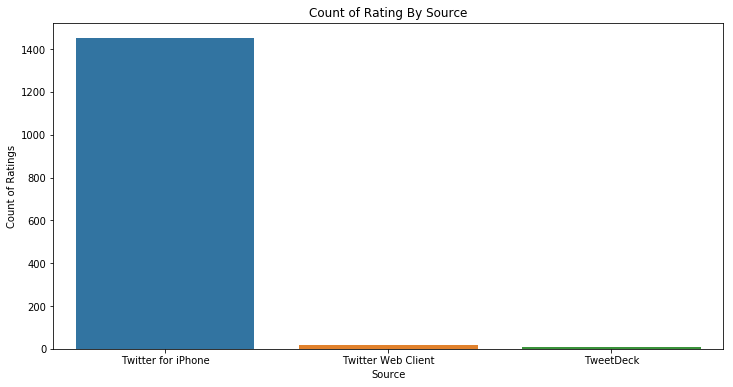

In [271]:
#Visualise the source with the highest number of ratings
plt.figure(figsize=(12,6))
sns.countplot(x = 'source_text', data = master_dog_df)
plt.xlabel('Source')
plt.ylabel('Count of Ratings')
plt.title('Count of Rating By Source');